NAME:  KAINAT RIAZ\
CMS ID: 327119\
CS876-COMPUTER VISION\
ASSIGNMENT # 1 (canny edge detection)

***REPORT IS INCLUDED IN THIS FILE***

The Canny edge detection algorithm have 5 steps:\
1.Noise reduction;\
2.Gradient calculation;\
3.Non-maximum suppression;\
4.Double threshold;\
5.Edge Tracking by Hysteresis.


In [ ]:
#importing all the libraries
import cv2
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
from google.colab import drive, files


# **STEP # 1 NOISE REDUCTION**
 edge detection results are highly sensitive to image noise so first step is to reduce noise in the test image.

In [ ]:
def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2GRAY)
  return image

In [ ]:

drive.mount('/content/drive/')
path = "/content/drive/My Drive/test Images/image3.jpg"
image = processImage(path)


Mounted at /content/drive/


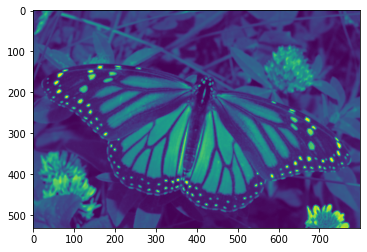

In [ ]:


gaussian_kernel = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6],[4,16,24,16,4],[1,4,6,4,1]], np.float32)/256
blur = cv2.filter2D(image,-1,gaussian_kernel)
plt.imshow(blur)
plt.show()


**RESULT AFTER NOISE REDUCTION**\
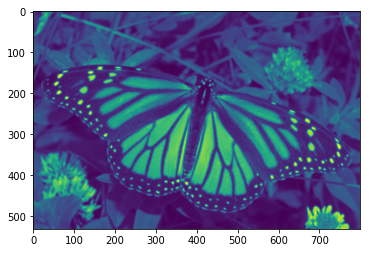


# **STEP # 2 :GRADIENT CALCULATION**
The Gradient calculation step detects the edge intensity and direction by calculating the gradient of the image using edge detection operators

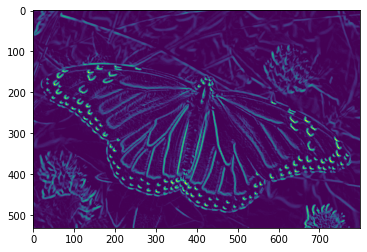

In [ ]:

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = cv2.filter2D(img,-1, Kx)
    Iy = cv2.filter2D(img,-1, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return G, theta



G,theta=sobel_filters(blur)
G=np.array(G,dtype=np.int32)
plt.imshow(G)
plt.show()


**RESULT AFTER GRADIENT CALCULATION**\
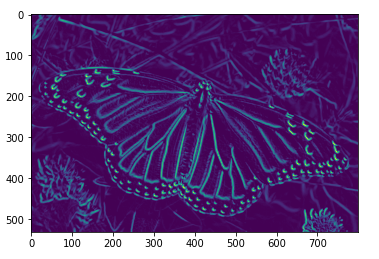



# **STEP # 3 :** **NON**-**MAXIMUM** **SUPRESSION**
Ideally, the final image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.

<function matplotlib.pyplot.show>

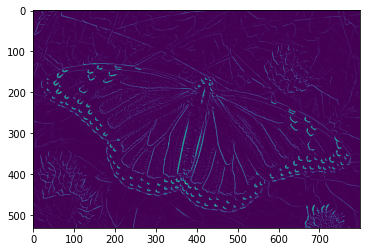

In [ ]:
def non_maximum_sup(img, D):
    X, Y = img.shape
    new = np.zeros((X,Y), dtype=np.int32)
    A = D * 180. / np.pi
    A[A < 0] += 180


    for i in range(1,X-1):
        for j in range(1,Y-1):
            try:
                s = 255
                t = 255

               #A 0
                if (0 <= A[i,j] < 22.5) or (157.5 <= A[i,j] <= 180):
                    s = img[i, j+1]
                    t = img[i, j-1]
                #A 45
                elif (22.5 <= A[i,j] < 67.5):
                    s = img[i+1, j-1]
                    t = img[i-1, j+1]
                #A 90
                elif (67.5 <= A[i,j] < 112.5):
                    s = img[i+1, j]
                    t = img[i-1, j]
                #A 135
                elif (112.5 <= A[i,j] < 157.5):
                    s = img[i-1, j-1]
                    t = img[i+1, j+1]

                if (img[i,j] >= s) and (img[i,j] >= t):
                    new[i,j] = img[i,j]
                else:
                    new[i,j] = 0

            except IndexError as e:
                pass

    return new
im=non_maximum_sup(G, theta)
plt.imshow(im)
plt.show

**RESULT AFTER NON-MAXIMUM SUPPRESSION**\
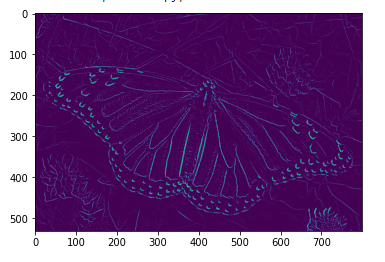

# **STEP # 4 :** **DOUBLE** **THRESHOLD**
The double threshold step aims at identifying 3 kinds of pixels: strong, weak, and non-relevant

<function matplotlib.pyplot.show>

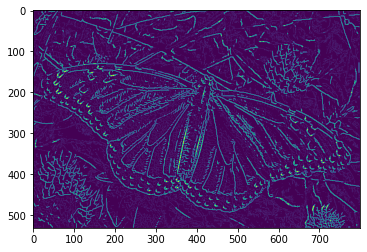

In [ ]:
def threshold(img, LTRatio=0.05, HTRatio=0.09):

    HT = img.max() * HTRatio;
    LT = HT * LTRatio;

    X, Y = img.shape
    temp = np.zeros((X,Y), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= HT)
    zeros_i, zeros_j = np.where(img < LT)

    weak_i, weak_j = np.where((img <= HT) & (img >= LT))

    temp[strong_i, strong_j] = strong
    temp[weak_i, weak_j] = weak

    return (temp, weak, strong)
thre,W,S=threshold(im)
plt.imshow(thre)
plt.show


**RESULT AFTER DOUBLE THRESHOLDING**\
The result of this step is an image with only 2 pixel intensity values (strong and weak)\
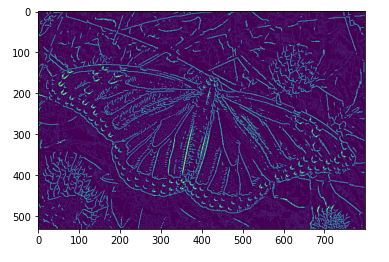


# **STEP # 5 : HYSTERESIS**
Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one

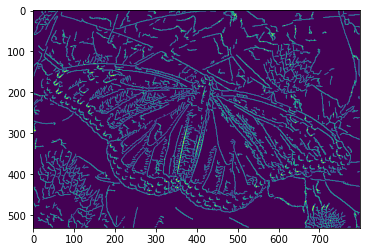

In [ ]:
def hysteresis(img, W, S=255):
    X, Y = img.shape
    for i in range(1, X-1):
        for j in range(1, Y-1):
            if (img[i,j] == W):
                try:
                    if ((img[i+1, j-1] == S) or (img[i+1, j] == S) or (img[i+1, j+1] == S)
                        or (img[i, j-1] == S) or (img[i, j+1] == S)
                        or (img[i-1, j-1] == S) or (img[i-1, j] == S) or (img[i-1, j+1] == S)):
                        img[i, j] = S
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img
final_result=hysteresis(thre,W,S)
plt.imshow(final_result)
plt.show()

**FINAL CANNY EDGE DECTECTION RESULT**\
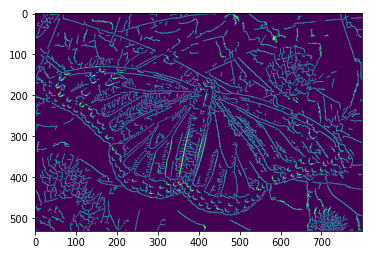